# Projet Série Temporelles
*AHOUMENOU Onel, DURAND Arnaud, DEVIGNAC Vladimir*

## Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Introduction

Dans ce projet, nous allons illustrer sur un jeu de données concret les méthodes étudiées au cours. Nos données proviennent du site kaggle https://www.kaggle.com/datasets/aminesnoussi/air-pollution-dataset. Il traite de la pollution de l'air à Pekin.

  L'objectif est donc de prédire la pollution futur à l'aide des données passées en suivant le plan suivant:

1. [Pré-traitement des données](#partie1)
2. [Gestion de la non-stationnarité](#partie2)
3. [Identification de modèle(s) probabiliste(s)](#partie3)
4. [Estimation des paramètres du(des) modèle(s)](#partie4)
5. [Prédiction des valeurs futures](#partie5)
6. [Evaluation de la précision de prédiction](#partie6)

## Pré-traitement des données <a id="partie1"></a>

### Analyse de la base de données

In [112]:
# Importation des données

data = pd.read_csv("data_bitcoin_coinmarketcap.csv", sep=";", index_col='timestamp', parse_dates=True)[['open', 'close', 'high', 'low', 'volume']]

In [113]:
# Visualisation

data.head()

,open,close,high,low,volume
timestamp,,,,,
2024-11-19 23:59:59.999000+00:00,90536.811526,92343.792055,94002.870108,90426.985381,7.452105e+10
2024-11-18 23:59:59.999000+00:00,89843.715479,90542.643996,92596.788919,89393.590574,7.553578e+10
2024-11-17 23:59:59.999000+00:00,90558.463112,89845.851209,91433.040503,88741.665832,4.635016e+10
2024-11-16 23:59:59.999000+00:00,91064.366226,90558.475236,91763.947884,90094.225369,4.433319e+10
2024-11-15 23:59:59.999000+00:00,87284.183098,91066.006955,91868.744436,87124.900860,7.824311e+10


In [115]:
data.dtypes

open      float64
close     float64
high      float64
low       float64
volume    float64
dtype: object

In [116]:
# Information par colonnes

data.describe()

,open,close,high,low,volume
count,183.000000,183.000000,183.000000,183.000000,1.830000e+02
mean,65015.107647,65129.133697,66287.704980,63867.465477,3.410460e+10
std,7156.796713,7421.829578,7460.662041,7214.268539,1.959799e+10
min,53949.087154,53948.752243,54838.145672,49121.237378,9.858199e+09
25%,60292.231357,60292.976126,61436.309613,58800.529157,2.263288e+10
50%,64176.367067,64178.990650,65007.546372,62873.615868,3.140029e+10
75%,67925.402279,67929.430917,69109.929591,66838.538284,3.895187e+10
max,91064.366226,92343.792055,94002.870108,90426.985381,1.336733e+11


In [117]:
# Dimensions de la base de données

data.shape

(183, 5)

In [118]:
# Nombre de valeurs manquantes par colonnes

data.isna().sum()

open      0
close     0
high      0
low       0
volume    0
dtype: int64

### Séparation train test

In [120]:
data.columns

Index(['open', 'close', 'high', 'low', 'volume'], dtype='object')

In [135]:
# Features
X = np.array([data.shape[0]-i-1 for i in range(data.shape[0])])

# Variable cible
y = np.array(data["close"])

In [136]:
X

array([182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170,
       169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157,
       156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144,
       143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131,
       130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118,
       117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105,
       104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,
        91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,
        65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,
        52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,
        39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,
        26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,
        13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   

Erreur quadratique moyenne (MSE): 71537480.6650701
Coefficient de détermination (R²): 0.12392642279217991


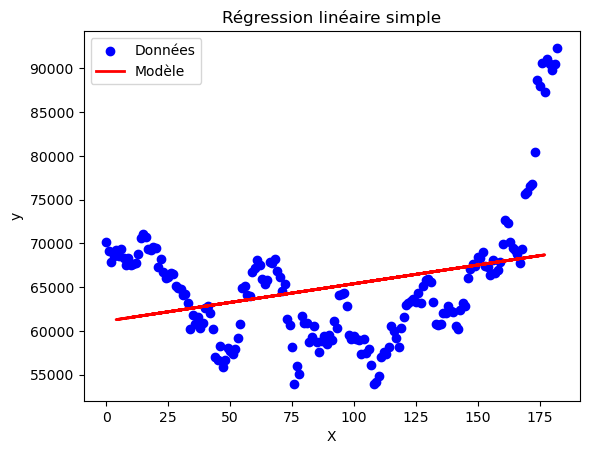

In [137]:
np.random.seed(0)

X.shape = (183, 1)
y.shape = (183, 1)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Création du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne (MSE):", mse)
print("Coefficient de détermination (R²):", r2)

# Visualisation des résultats
plt.scatter(X, y, color="blue", label="Données")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Modèle")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Régression linéaire simple")
plt.legend()
plt.show()

In [138]:
Xt = pd.DataFrame(y - model.predict(X), index=data.index)

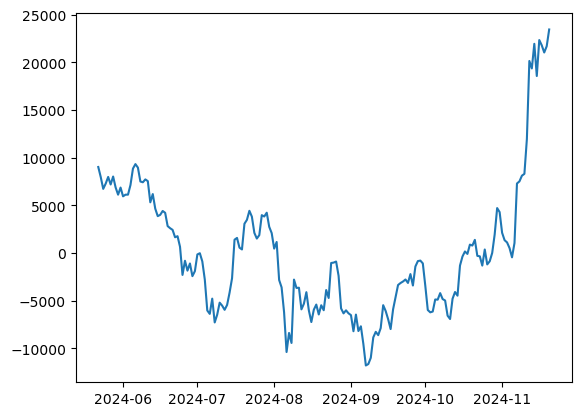

In [139]:
plt.plot(Xt)

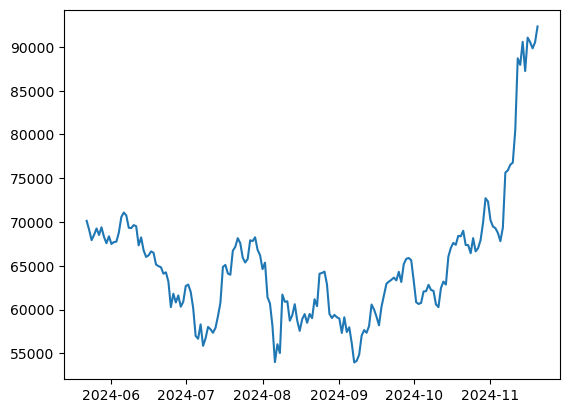

In [140]:
plt.plot(data['close'])